Download dataset from kaggle

In [ ]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/kaggle.json
!mkdir data
%cd data
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations
!unzip h-and-m-personalized-fashion-recommendations.zip
!rm -r images/
!rm h-and-m-personalized-fashion-recommendations.zip
%cd ../

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [7]:
articles_file = "data/articles.csv"
customers_file = "data/customers.csv"
transactions_file = "data/transactions_train.csv"

In [10]:
articles = pd.read_csv(articles_file)
customers = pd.read_csv(customers_file)
transactions = pd.read_csv(transactions_file)

In [22]:
transactions = transactions[["customer_id", "article_id", "t_dat"]]

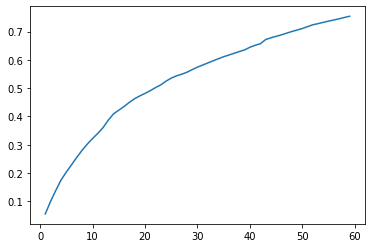

In [26]:
x = []
y = []
plt.close()

for n_weeks in range(1, 60):
  x.append(n_weeks)
  last_day = transactions['t_dat'].max()
  last_day_date = [int(i) for i in last_day.split('-')]
  last_day_date = datetime.date(last_day_date[0], last_day_date[1], last_day_date[2])
  min_date = last_day_date - datetime.timedelta(weeks=n_weeks)
  min_date = min_date.strftime('%Y-%m-%d')
  df_view = transactions['t_dat'] >= min_date
  active_customers = transactions[df_view]["customer_id"].unique()
  y.append(len(active_customers)/len(customers))

plt.plot(x, y)
plt.show()

In [27]:
print(f"during  the last 52 weeks, {y[51]*100}% of customers have at least one purchase")

during  the last 52 weeks, 72.41300893599032% of customers have at least one purchase


In [41]:
first_purchases = transactions.sort_values(by="t_dat").groupby('customer_id').first()
first_purchase_counts = first_purchases["article_id"].value_counts()
top_first_purchases = first_purchase_counts[:20].index

In [42]:
print(top_first_purchases)

Int64Index([399223001, 568601006, 706016001, 706016002, 372860001, 399256001,
            610776002, 539723005, 573716012, 484398001, 673396002, 507909001,
            673677002, 507910001, 562245001, 539723001, 464297007, 579541001,
            608776002, 562245018],
           dtype='int64')
